In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [106]:
data = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")

In [107]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [109]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

le = preprocessing.LabelEncoder()
data['GENDER']= le.fit_transform(data['GENDER'])
data['LUNG_CANCER']= le.fit_transform(data['LUNG_CANCER'])

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

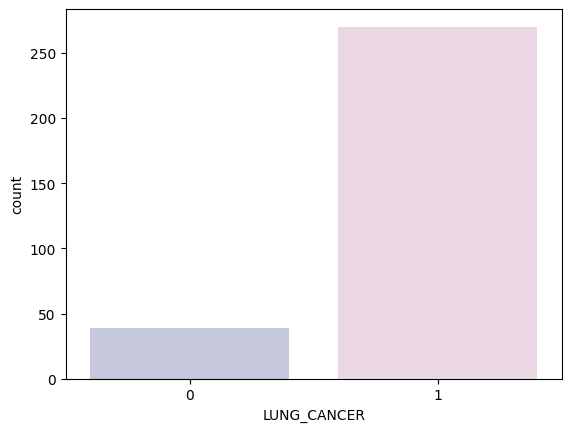

In [110]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["LUNG_CANCER"], palette= cols)

In [111]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


<Axes: >

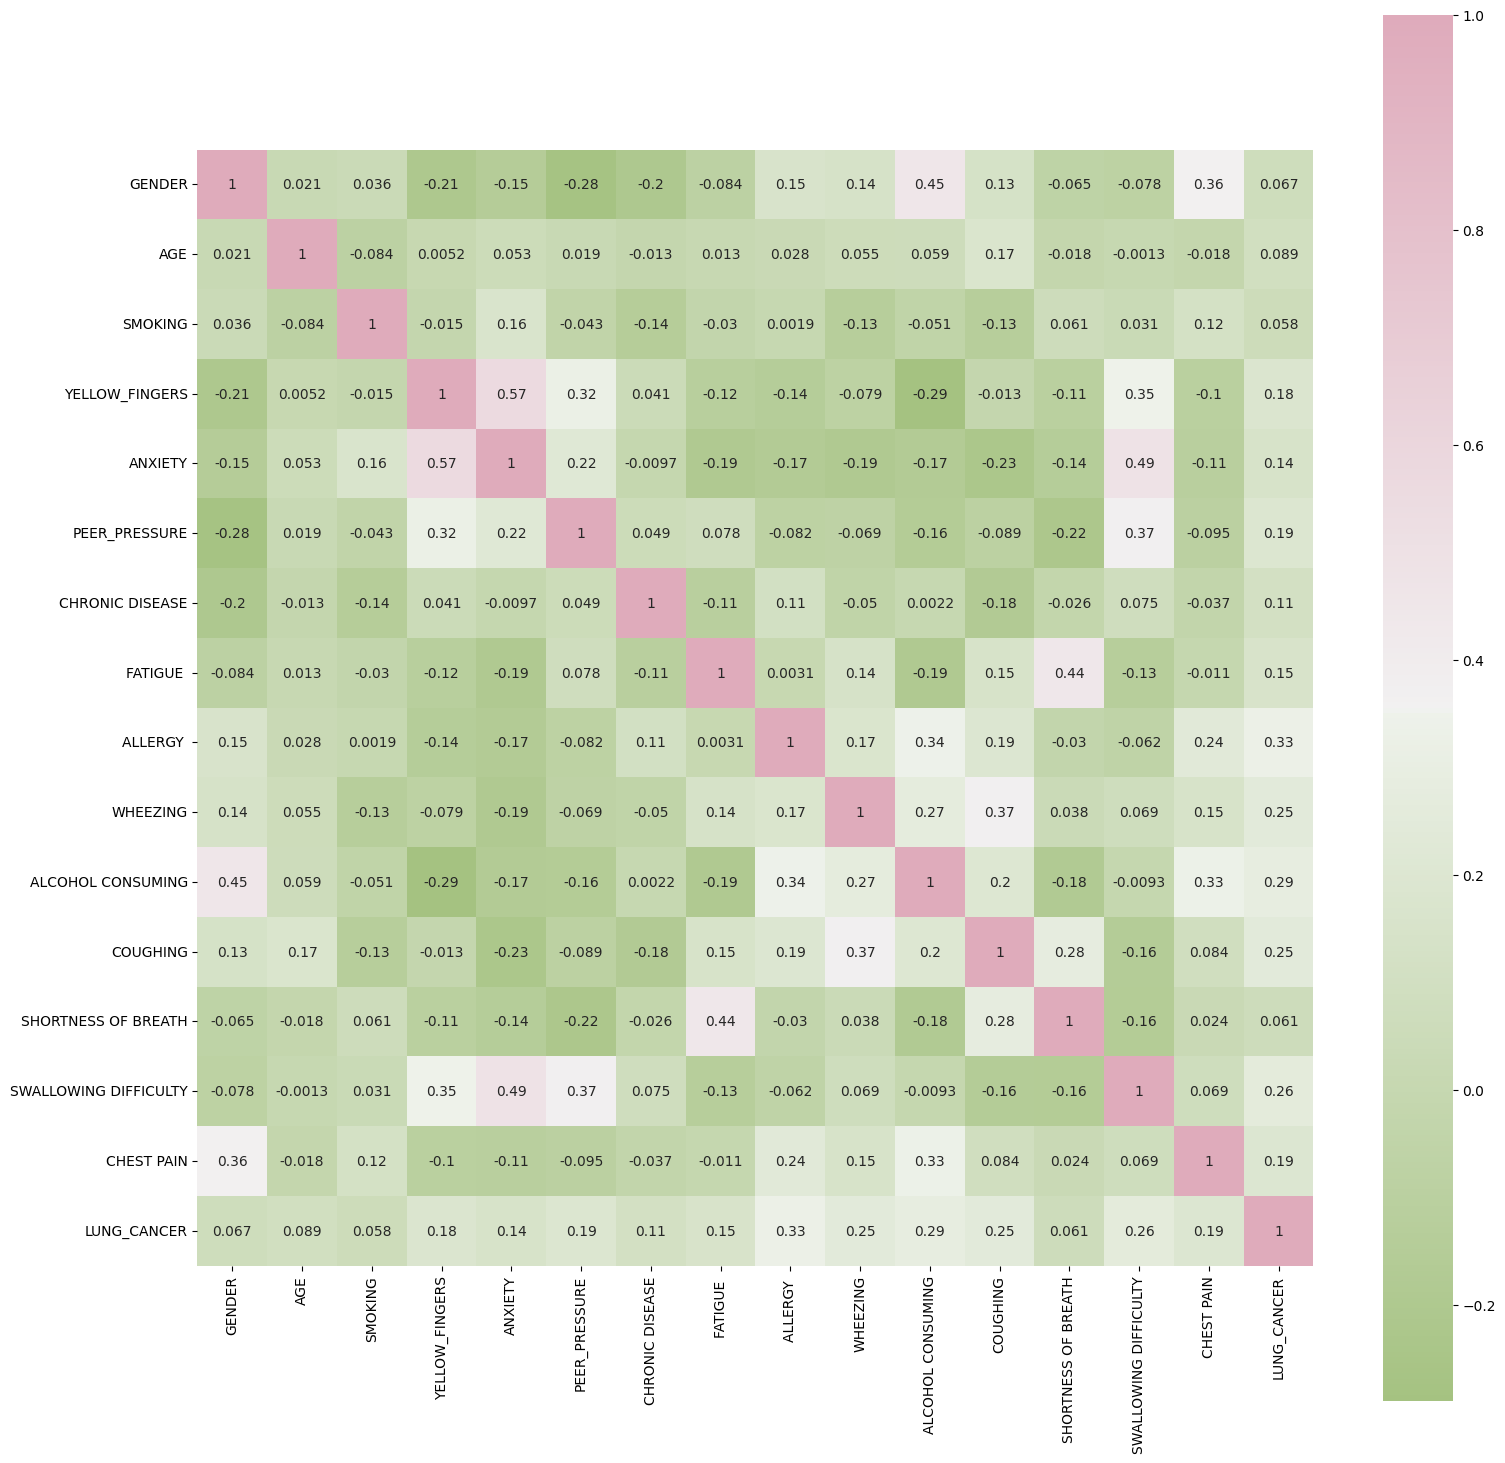

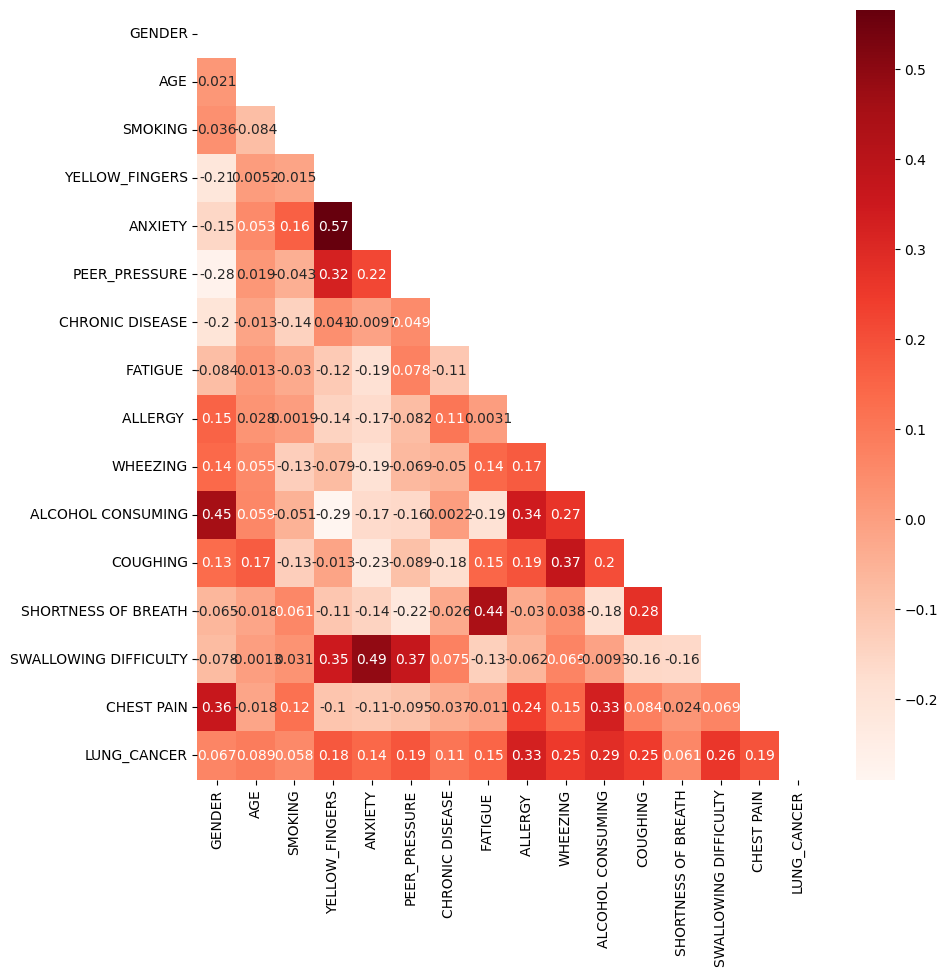

In [112]:
corrmat = data.corr()
cmap = sns.diverging_palette(108,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

mask=np.zeros_like(data.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,mask=mask,cmap='Reds')

In [113]:
#6.adım x ve y olarak df bölünmesi, kategorik veri dönüşümü
from tensorflow.keras.utils import to_categorical

x = data.drop(['LUNG_CANCER'], axis=1)
y = to_categorical(data.LUNG_CANCER)

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=True, test_size=0.7)

In [115]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()

In [116]:
model.add(Dense(units = 20,  activation = 'relu', input_dim = len(x.columns)))

model.add(Dense(units = 15,  activation = 'relu' ))

model.add(Dense(units = 5,  activation = 'relu' ))

model.add(Dense(2, activation='sigmoid'))

In [117]:
#10.adım modelin derlenmesi ve eğitilmesi
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

history=model.fit(x_train, y_train , epochs = 100, verbose=1)


#11.adım modelin tahminlerinin elde edilmesi 0.5 ile karşılaştırılması
y_pred = model.predict(x_test)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9130
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9130
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9130
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9130
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9130
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9130
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9130
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9130
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9130
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9130
Epoch 11/100
3/3 [===========

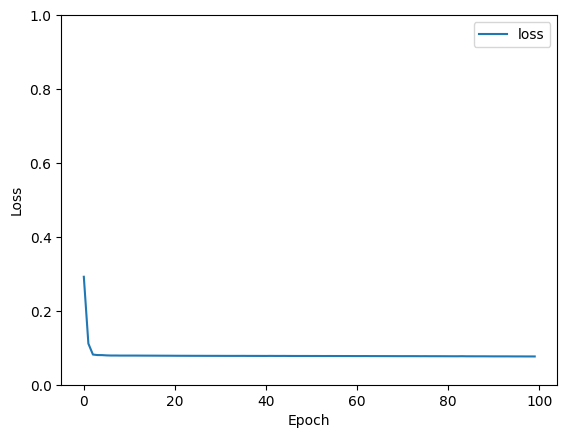

In [118]:

#12.adım görselleştirme
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.close()


plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');
plt.show()
plt.close()

In [119]:
#13.adım modelin train ve test doğruluklarını çıkarın
test_score, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.8571
Test accuracy: 0.8571428656578064
